## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Data Profiling](#section3)<br>
    - 3.1 [Understanding the data](#section301)<br>
    - 3.2 [Pre-profiling of the data](#section302)<br>
    - 3.3 [Pre-processing of the Data](#section303)<br>
    - 3.4 [Post-profiling of the data](#section304)<br>
4. [Identify Patterns in Data](#section4)<br>
    - 4.1 [Teams Wins in Home Cities vs Other Cities](#section401)<br>
    - 4.2 [Teams Wins while batting first](#section402)<br>
    - 4.3 [Teams Wins while bowling first](#section403)<br>
5. [Questions](#section5)<br>
    - 5.1 [Who won the Player of the match maximum no. of times ?](#section501)<br>
    - 5.2 [What is the impact of toss on match outcome ?](#section502)<br>
6. [Conclusion](#section6)<br>

### 1. Problem Statement

This notebooks explors or analsyses the data from the IPL data set of various seasons of IPL. This includes performing __Exploratory Data Analysis__ by __cleaning, loading, inspecting, exploring, determining relationship__ between the data and __finding patterns__ from the data

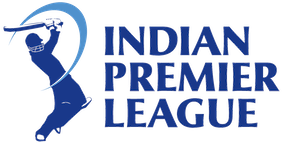

### 2. Data Loading and Description

- The data set contains the __actual data from all the seasons of IPL from 2008 to 2018.__ So, this is __not a sample data.__

- The data set contains __696 observations__ and __18 columns__. 



#### Background

- IPL called as Indian Premier league is a tournament of Cricket.
- In this tournament, 8 teams from all over India participate and they are named on the names of States or Cities within India.
- Players from all over the World are auctioned for different teams.
- This is a short format cricket i.e. each team gets 20 overs to bat and bowl each.
- This tournament is important from players point of view of getting selecting in their respective national teams and also they get highly paid as per their performance.

#### Importing packages

In [222]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns    
import sys
# Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [223]:
matches=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/matches.csv',
                    encoding='UTF-8')

### 3. Data Profiling

- Understanding the data i.e what are the different columns, different types of data etc.etc.
- Perform pre-profiling on the data.
- Transform the data for missing, incorrect values.
- Perform post-profiling on the data.

#### 3.1 Understanding the data

In [224]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [225]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [226]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [227]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
691,7949,2018,Pune,20/05/18,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,L Ngidi,Maharashtra Cricket Association Stadium,Nitin Menon,Yeshwant Barde,Marais Erasmus
692,7950,2018,Mumbai,22/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,2,F du Plessis,Wankhede Stadium,Marais Erasmus,C Shamshuddin,S Ravi
693,7951,2018,Kolkata,23/05/18,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kolkata Knight Riders,25,0,AD Russell,Eden Gardens,Nitin Menon,Anil Chaudhary,Kumar Dharmasena
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


In [228]:
#Check how many played in each season of IPL
x, y = 2008, 2019
while x < y:
    count_matches_each_season = matches[matches['season'] == x].groupby(['season'])['season'].count()
    print(count_matches_each_season)
    x+=1

season
2008    58
Name: season, dtype: int64
season
2009    57
Name: season, dtype: int64
season
2010    60
Name: season, dtype: int64
season
2011    73
Name: season, dtype: int64
season
2012    74
Name: season, dtype: int64
season
2013    76
Name: season, dtype: int64
season
2014    60
Name: season, dtype: int64
season
2015    59
Name: season, dtype: int64
season
2016    60
Name: season, dtype: int64
season
2017    59
Name: season, dtype: int64
season
2018    60
Name: season, dtype: int64


In [229]:
matches.describe(include = 'all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,696.000000,696.000000,689,696,696,696,696,696,696,696.000000,693,696.000000,696.000000,693,696,695,695,60
unique,NaN,NaN,32,498,14,14,14,2,3,NaN,14,NaN,NaN,214,35,55,58,18
top,NaN,NaN,Mumbai,2017-04-09,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,NaN,94,2,91,90,90,413,686,NaN,98,NaN,NaN,20,73,73,56,6
mean,974.103448,2012.965517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027299,NaN,13.472701,3.349138,NaN,NaN,NaN,NaN,NaN
std,2143.239623,3.069266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163070,NaN,23.607994,3.411398,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,174.750000,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,348.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,522.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


#### Observations:

In [230]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

- From the above we see that __umpire3__ column contains __maximum null values.__
- Need to __handle missing values__ for __City, winner, player_of_match and umpire1, umpire2.__
- Also, from the head and tail commands we see that the date format is different i.e. we have two different date formats in the dataset: __yyyy-mm-dd__ and __dd/mm/yy__

#### 3.2 Pre-profiling of the data

In [231]:
profile = pandas_profiling.ProfileReport(matches)
profile.to_file(outputfile="matches_before_preprocessing.html")
profile

Number of variables,18
Number of observations,696
Total Missing (%),5.2%
Total size in memory,98.0 KiB
Average record size in memory,144.1 B
Numeric,4
Categorical,13
Boolean,1
Date,0
Text (Unique),0
Rejected,0


#### 3.3 Pre-processing of the Data

- Dealing with missing values
    - Drop the column umpire3 as it has too many missing null values
    - Date - to convert the date field to a uniform format using to_datetime

In [232]:
#Drop the colum umpire3
matches.drop('umpire3',axis=1,inplace=True)

In [233]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [234]:
#Convert the date to a uniform format using to_datetime
matches['date'] = pd.to_datetime(matches['date'],errors='coerce')

In [235]:
matches.dtypes

id                          int64
season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
dtype: object

In [236]:
#Handling missing values for City
matches[matches['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


- Here, we see the venue for all the missing City value is "Dubai International Cricket Stadium". 
- So, we will put here the City as Dubai

In [237]:
#Setting the appropriate value for missing City values
matches[matches['city'].isnull()] = 'Dubai'

In [238]:
#Check if there are still any null values for City
matches[matches['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [239]:
matches[matches['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21 00:00:00,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29 00:00:00,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17 00:00:00,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


In [240]:
matches[matches['player_of_match'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21 00:00:00,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29 00:00:00,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17 00:00:00,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


- Here, it is observed that the matches for whom __winner__ and __player_of_match values are missing are the same__.
- This could be due to the fact that those __matches could not be played due to some weather conditions or 
or some other problems.__

In [241]:
matches[matches['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08 00:00:00,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [242]:
matches[matches['umpire2'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08 00:00:00,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [243]:
umpire1mode = matches[matches['season'] == 2017].mode().umpire1
umpire1mode[~umpire1mode.isna()].loc[0]

umpire2mode = matches[matches['season'] == 2017].mode().umpire2
umpire2mode[~umpire2mode.isna()].loc[0]

'S Ravi'

In [244]:
matches['umpire1'] = matches.umpire1.fillna(umpire1mode[~umpire1mode.isna()].loc[0])

In [245]:
matches['umpire2'] = matches.umpire1.fillna(umpire2mode[~umpire2mode.isna()].loc[0])

In [246]:
matches[matches['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [247]:
matches[matches['umpire2'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


- Replaced the __umpire1 and umpire2 null values__ with the __mode values of umpire1 and umpire2 of that particular IPL season.__
- Now, there are __no null values in the entire dataset.__

In [248]:
#Add this column to eliminate the DivisionByZero error while post profiling
matches['ignore']=0.0
#After adding the above to remove the duplicates, added the below statement
matches.drop_duplicates(inplace=True)

In [249]:
matches.shape

(690, 18)

#### 3.4 Post-profiling of the data

In [250]:
postprofiling = pandas_profiling.ProfileReport(matches)
postprofiling.to_file(outputfile="matches_after_preprocessing.html")
postprofiling

Number of variables,19
Number of observations,690
Total Missing (%),0.0%
Total size in memory,102.5 KiB
Average record size in memory,152.1 B
Numeric,1
Categorical,15
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [251]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             3
win_by_runs        0
win_by_wickets     0
player_of_match    3
venue              0
umpire1            0
umpire2            0
ignore             0
dtype: int64

### 4. Identify Patterns in Data

#### 4.1 Teams Wins in Home Cities vs Other Cities

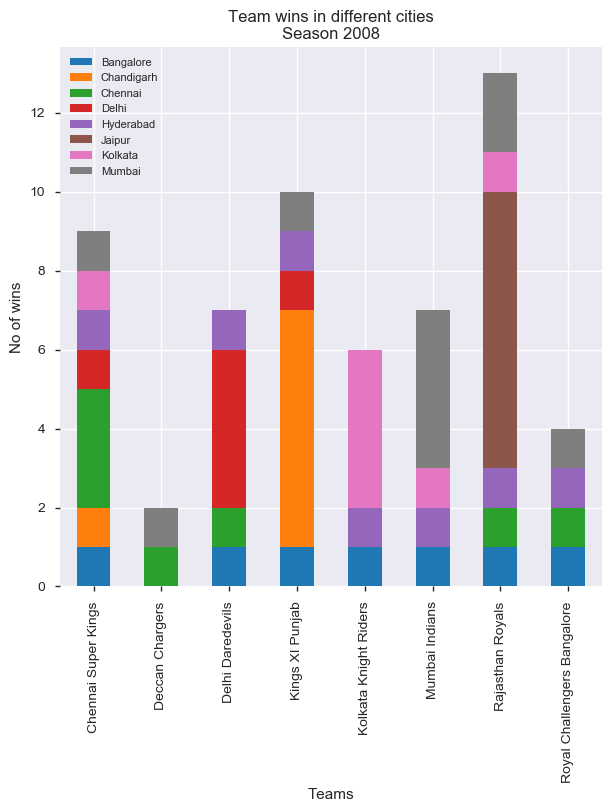

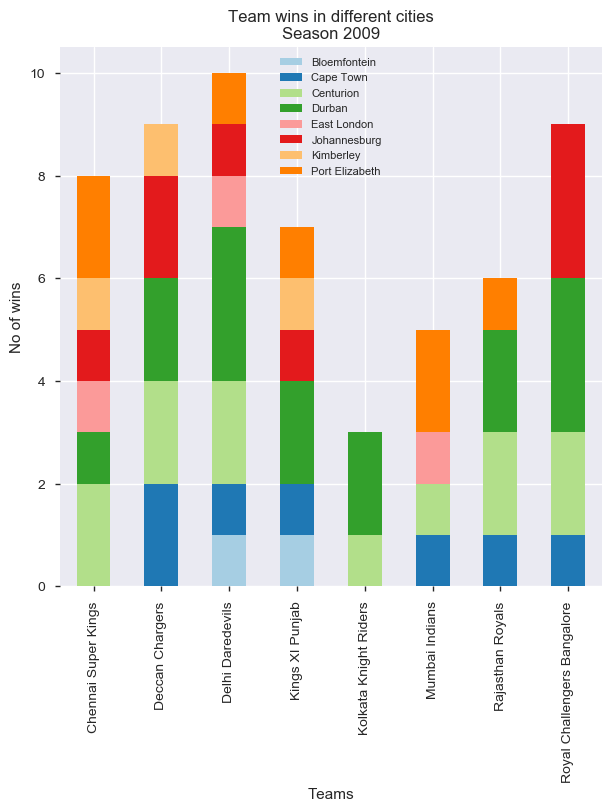

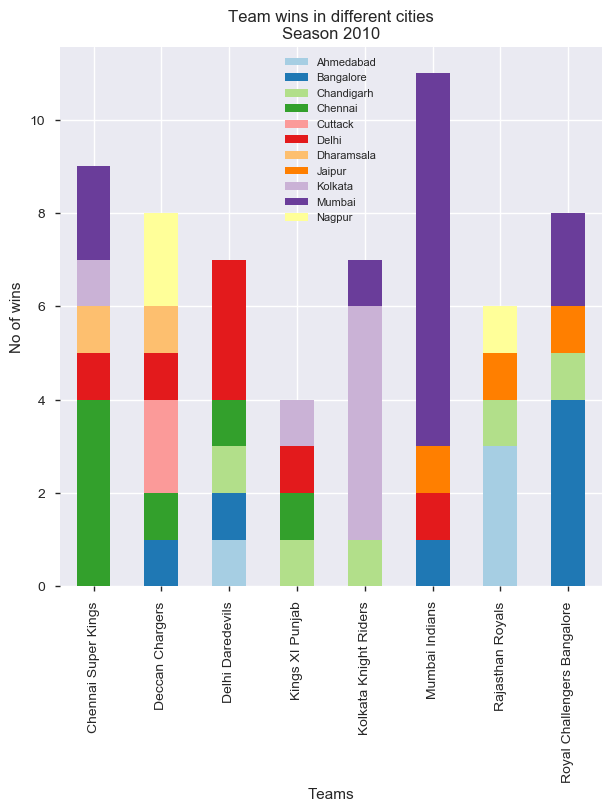

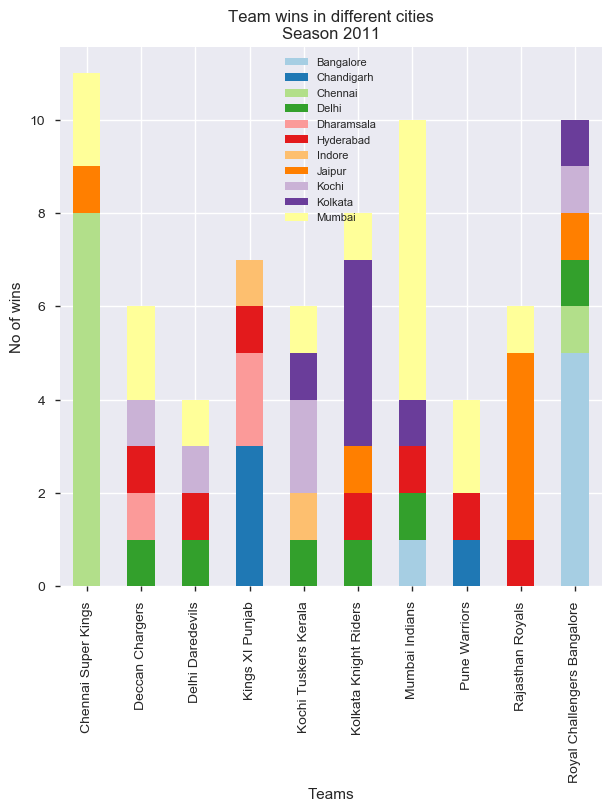

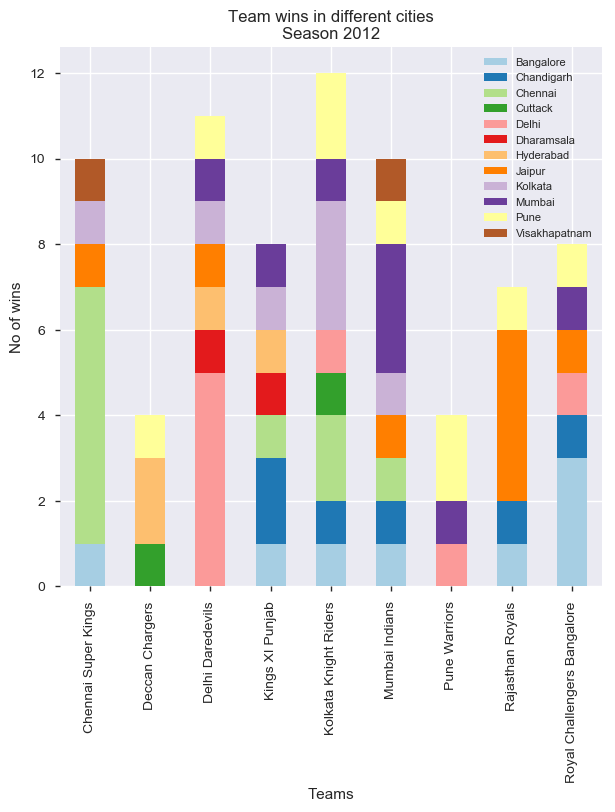

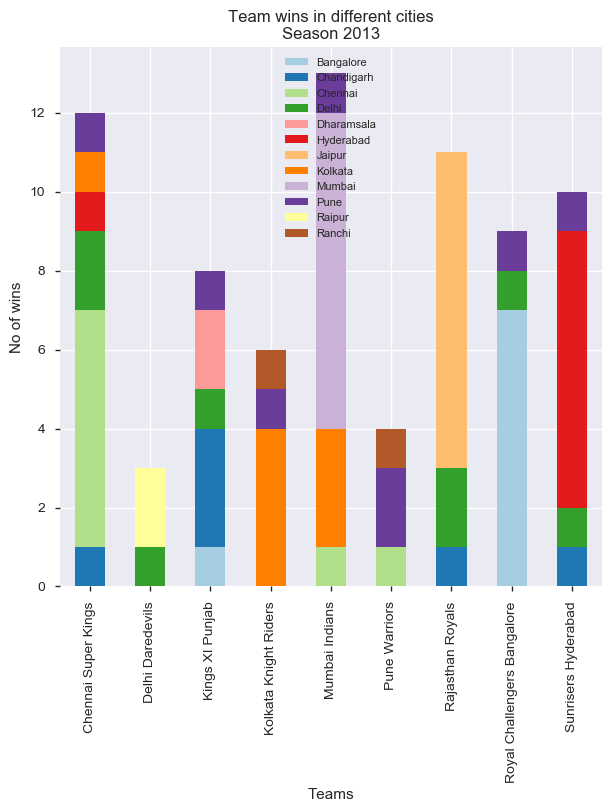

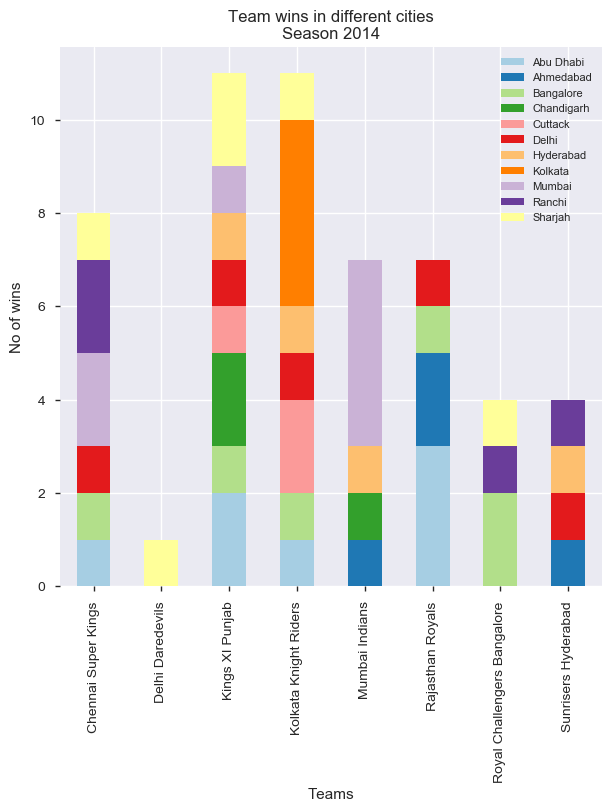

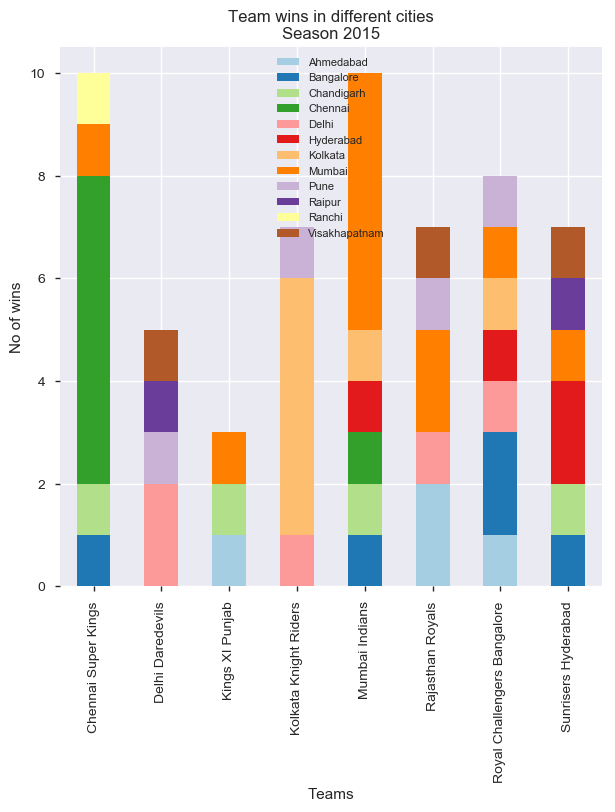

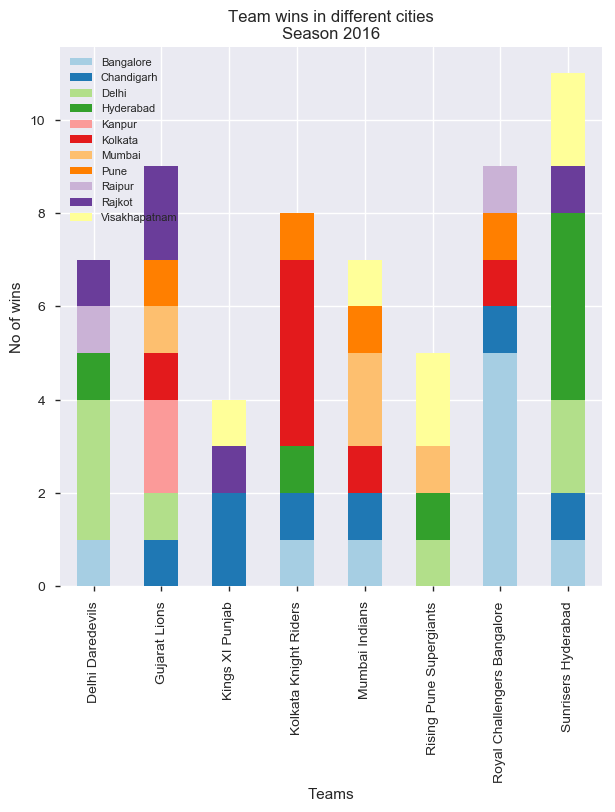

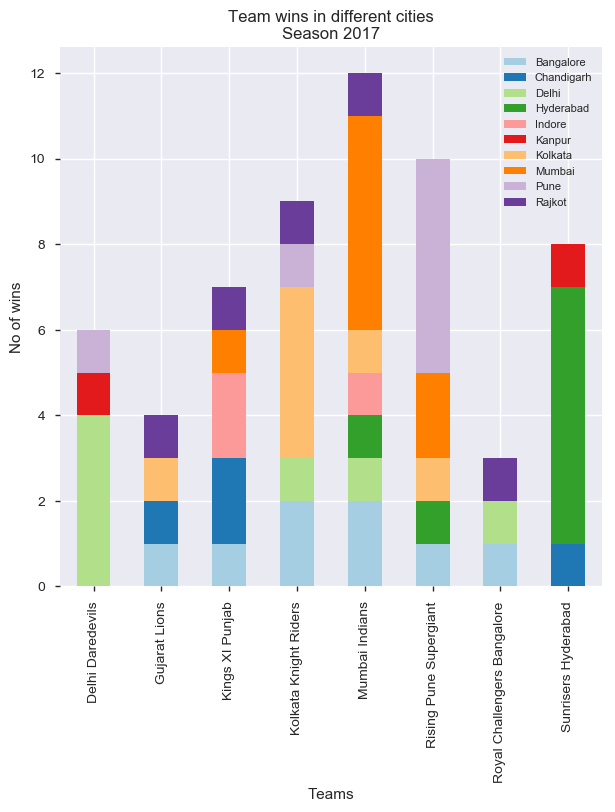

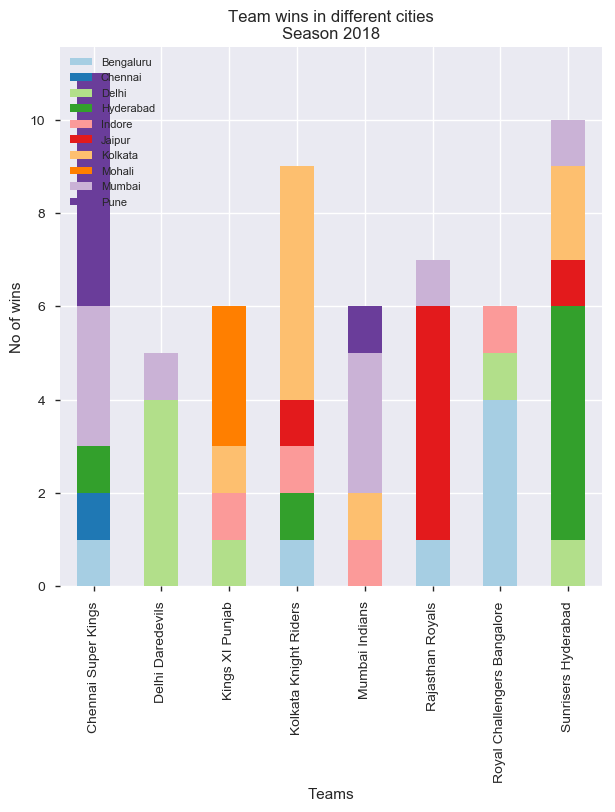

In [252]:
#No of wins by team and season in each city
x, y = 2008, 2019
while x < y:
    wins_percity = matches[matches['season'] == x].groupby(['winner', 'city'])['id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+str(x), figsize=(7,7))
    sns.set_palette("Paired", len(matches['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(loc='best', prop={'size':8})
    x+=1

#### 4.2 Teams Wins while batting first 

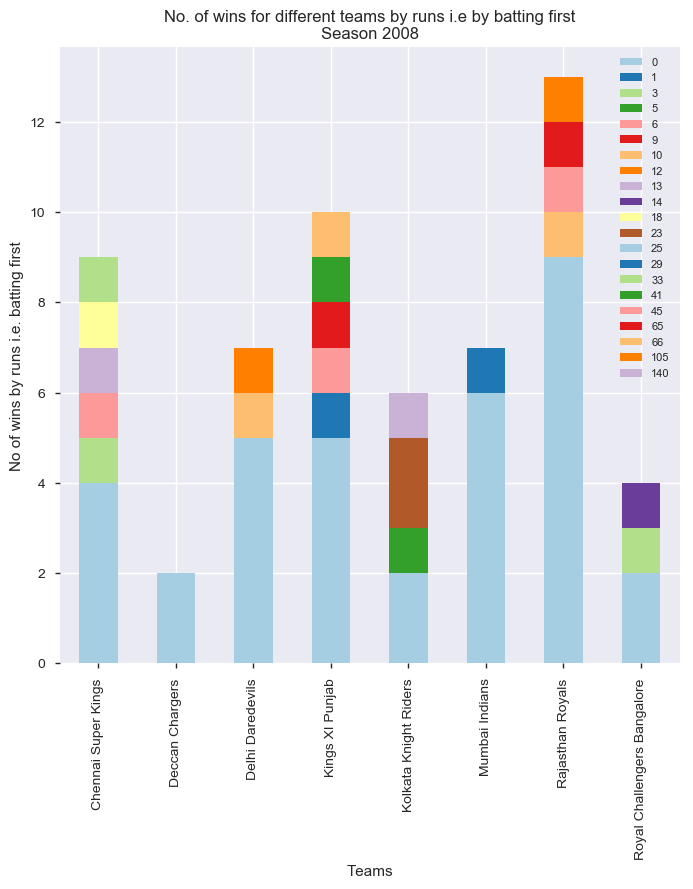

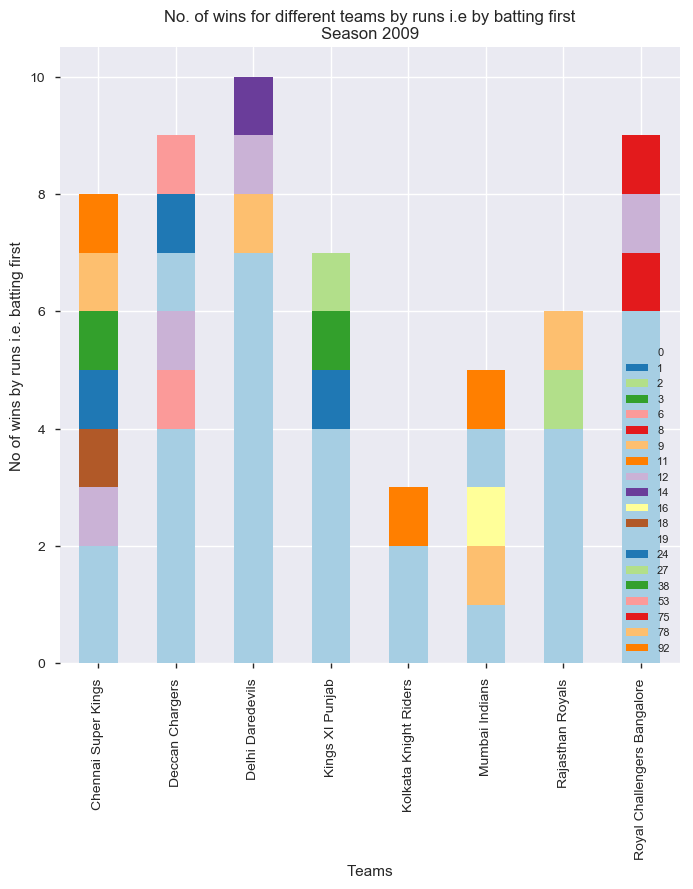

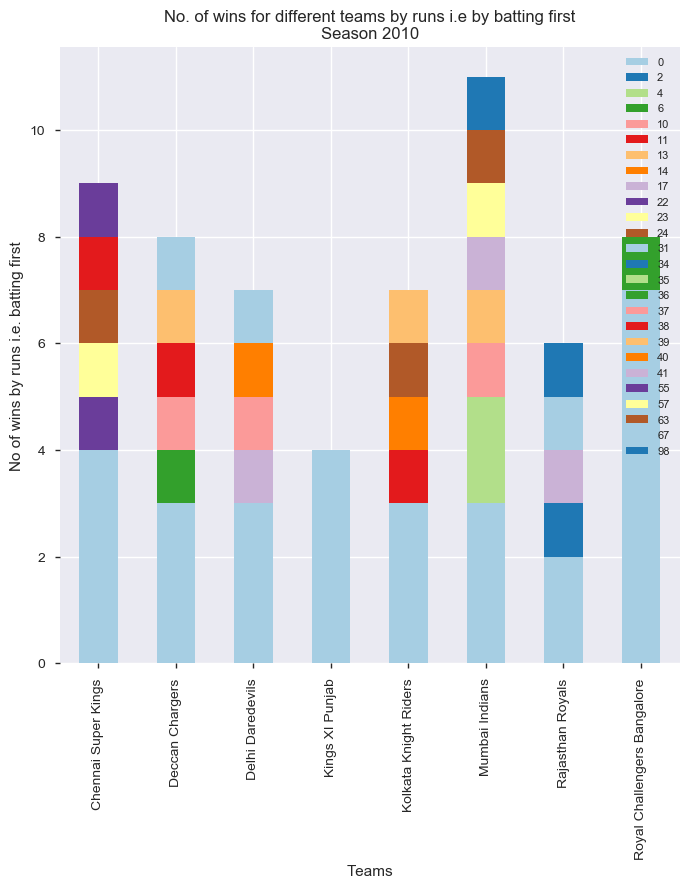

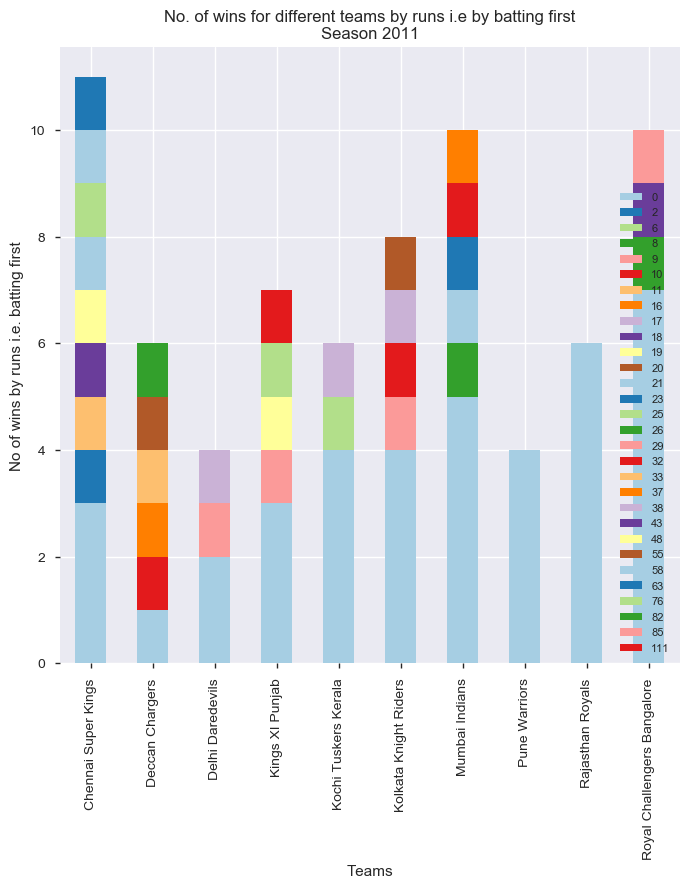

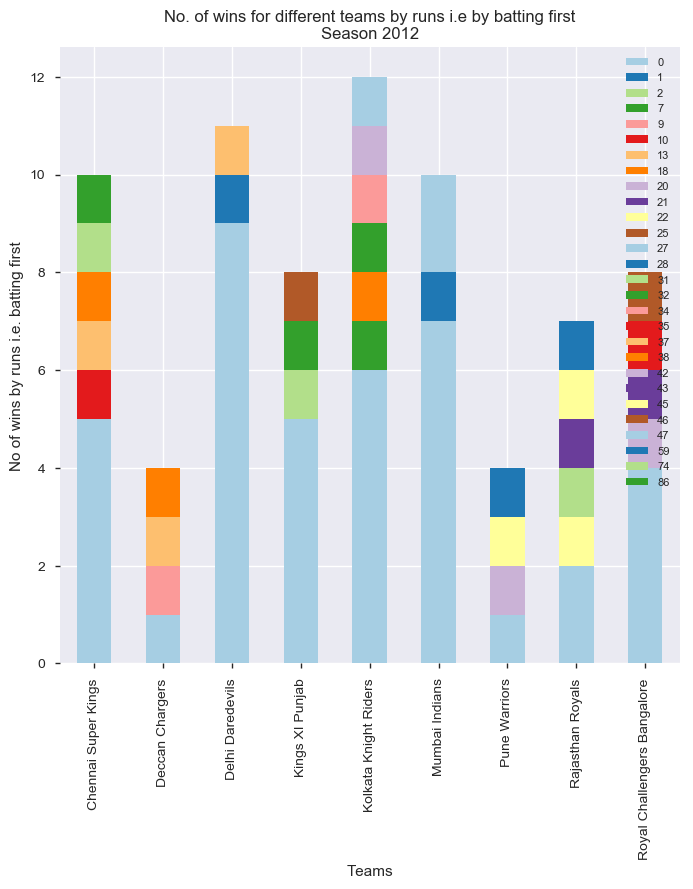

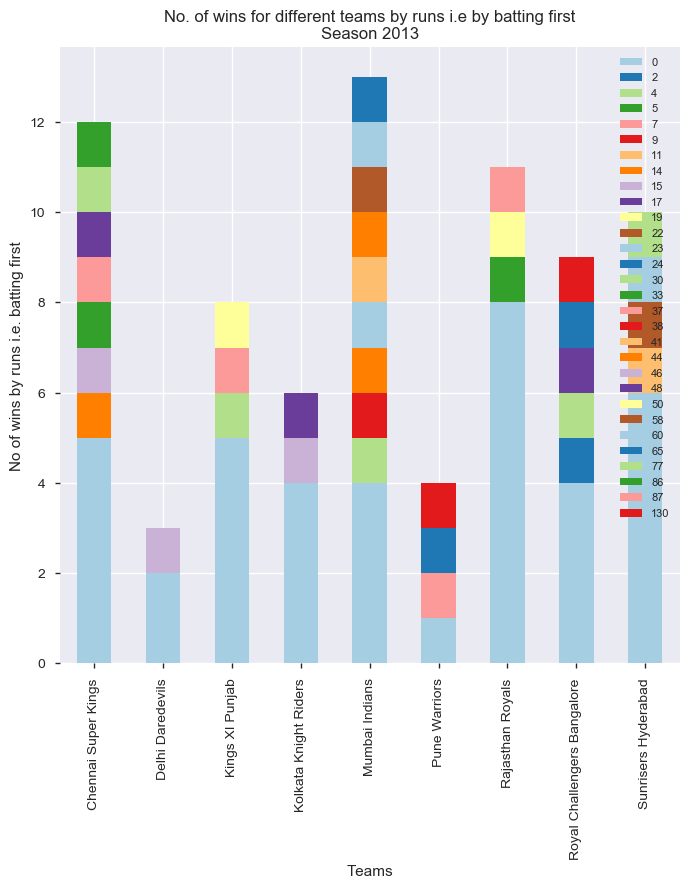

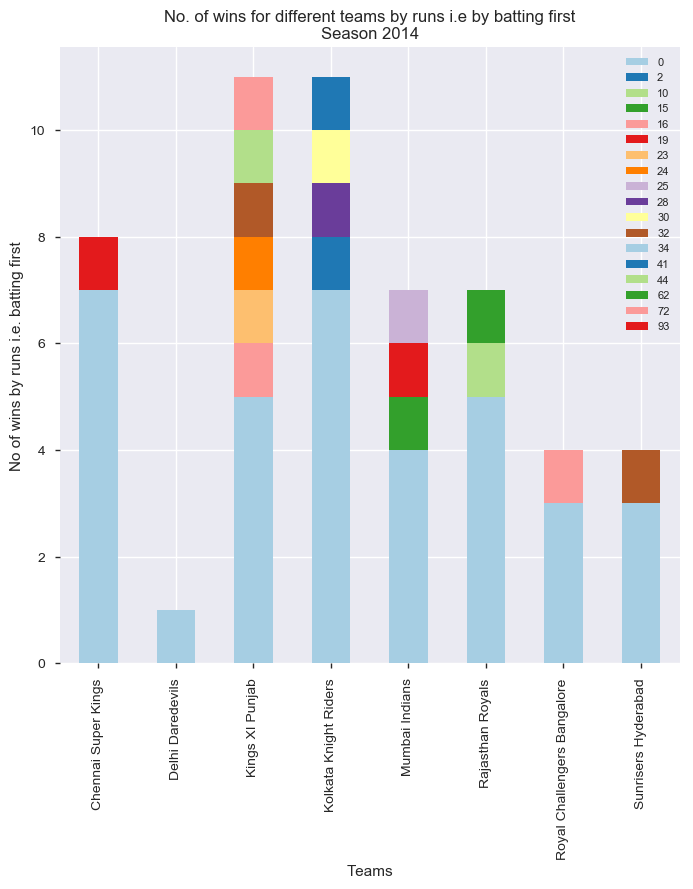

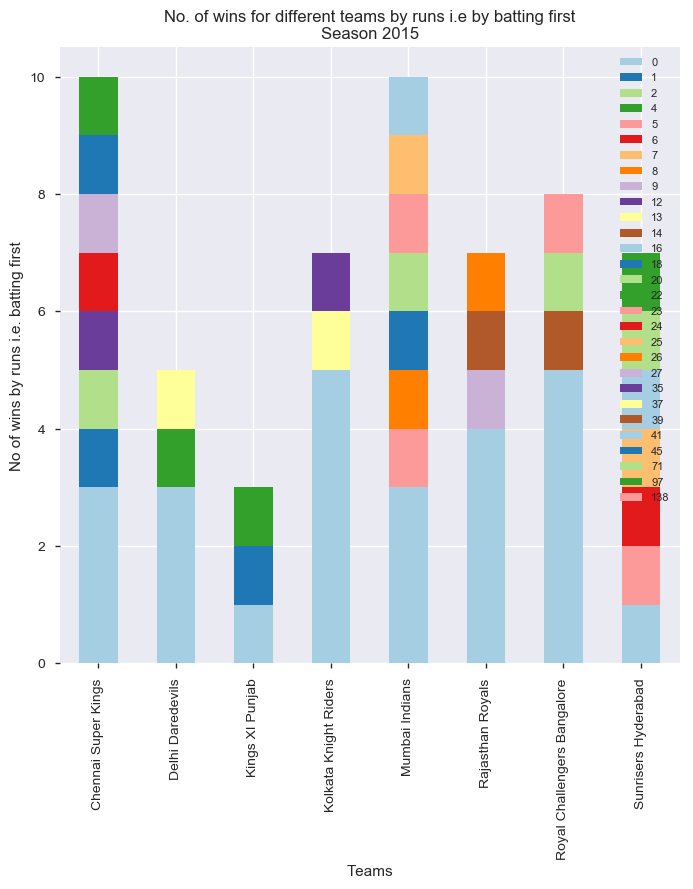

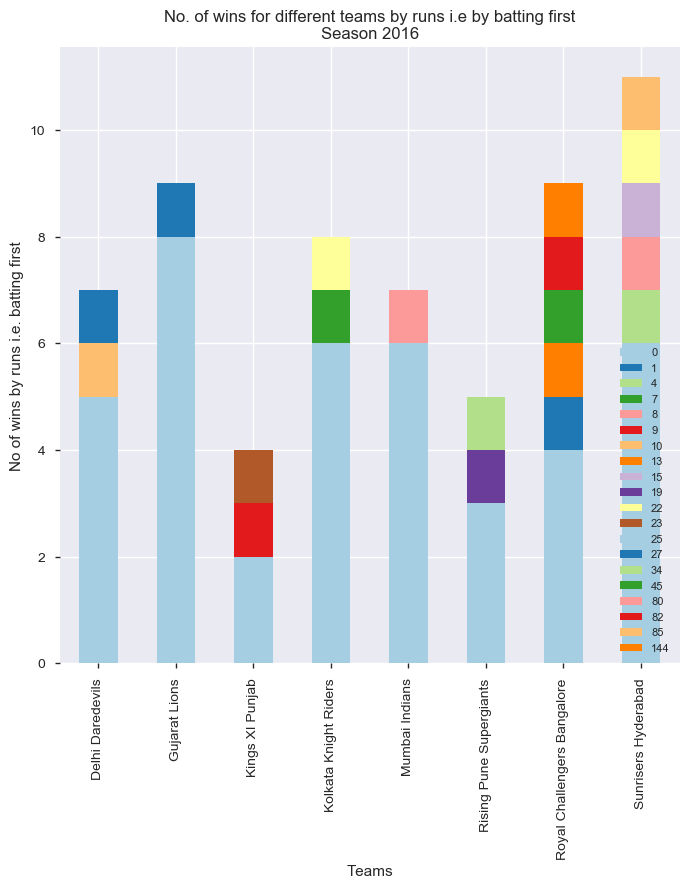

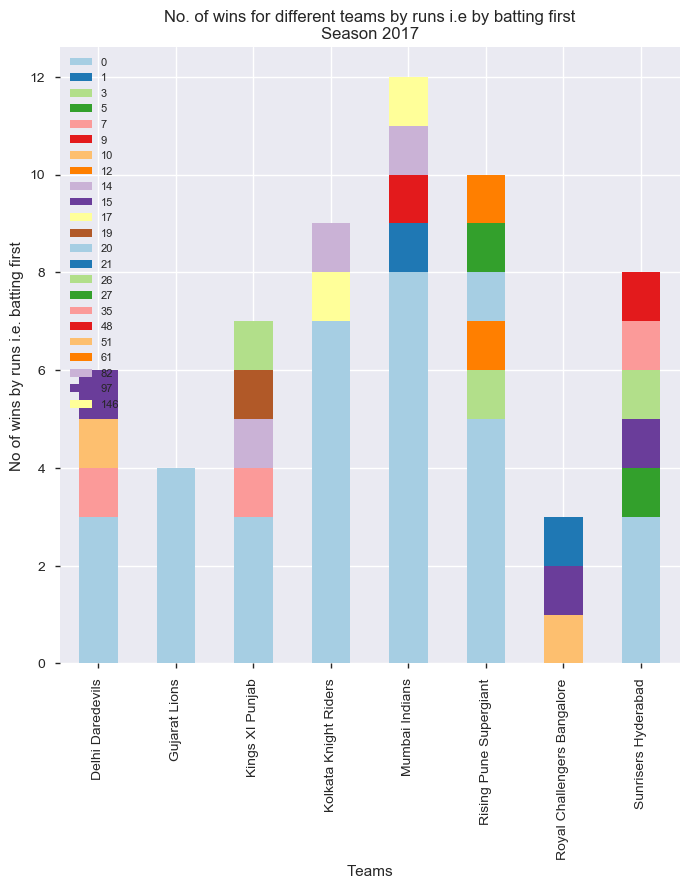

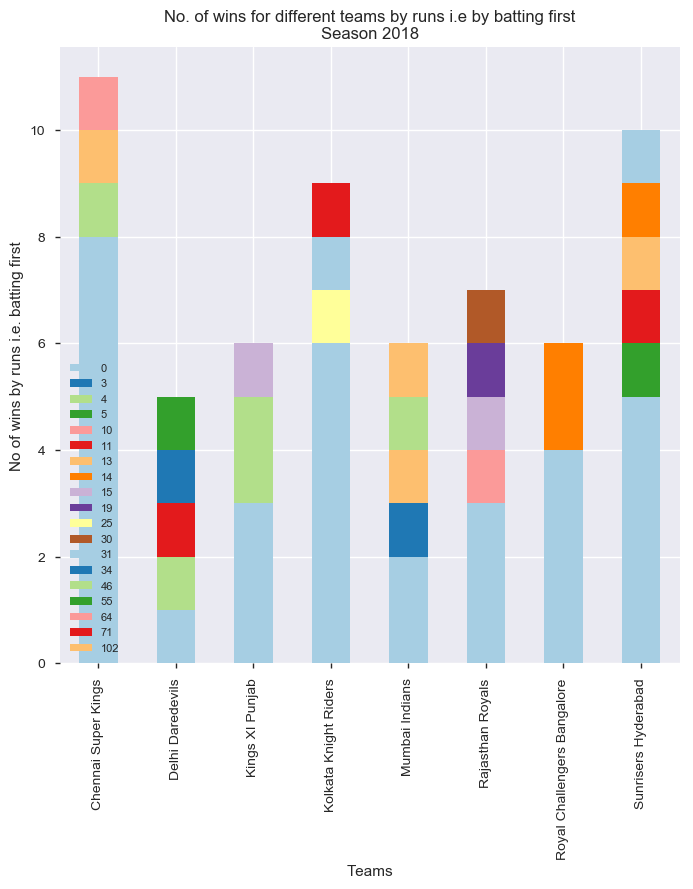

In [253]:
x, y = 2008, 2019
while x < y:
    wins_byruns = matches[matches['season'] == x].groupby(['winner','win_by_runs'])['win_by_runs'].count().unstack()
    plot = wins_byruns.plot(kind='bar', stacked=True, title="No. of wins for different teams by runs i.e by batting first\nSeason "+str(x), figsize=(8,8))
    sns.set_palette("Paired", len(matches['win_by_runs'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins by runs i.e. batting first")
    plot.legend(loc='best', prop={'size':8})
    x+=1

#### 4.3 Teams Wins while bowling first 

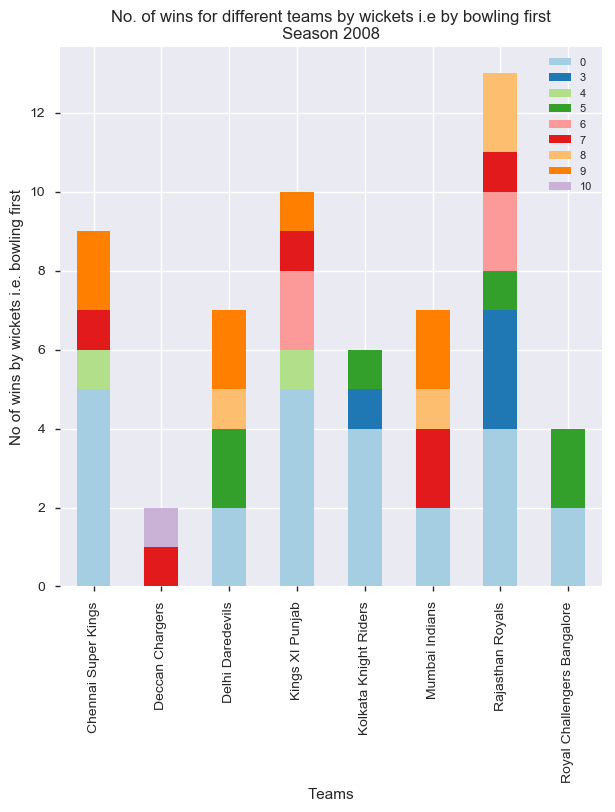

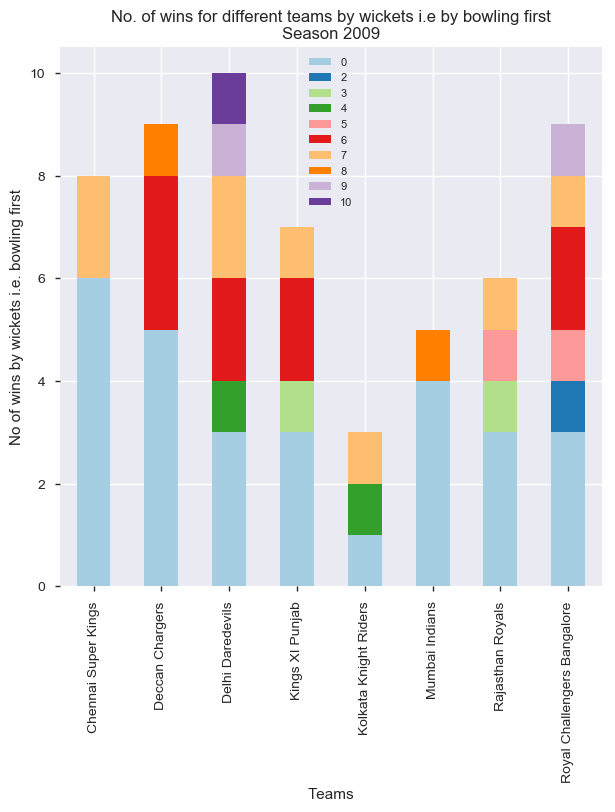

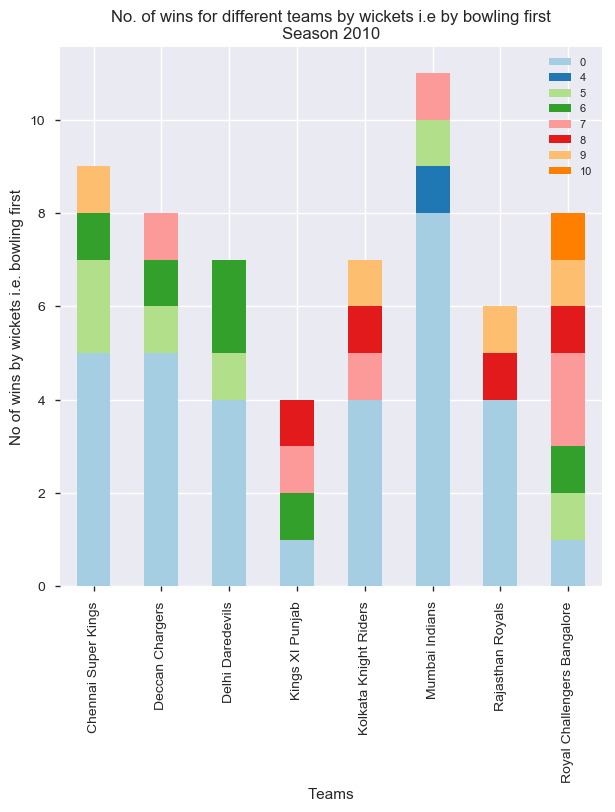

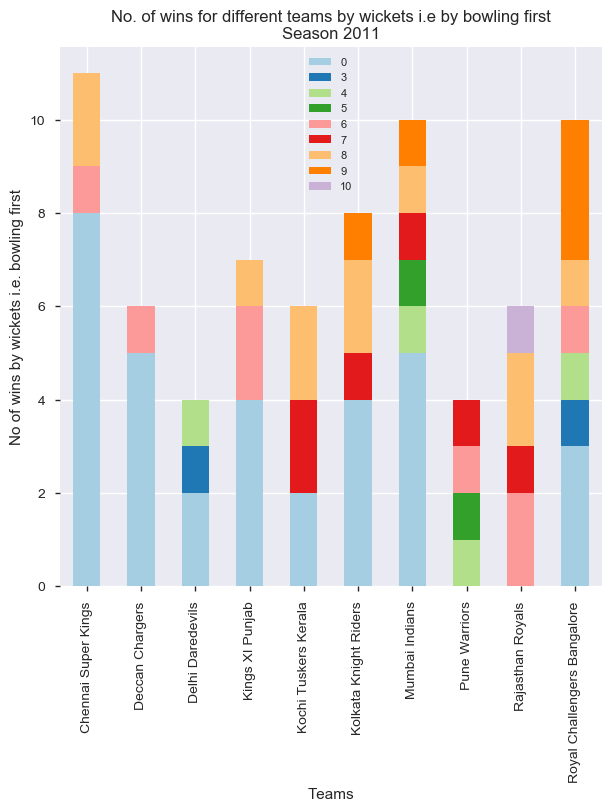

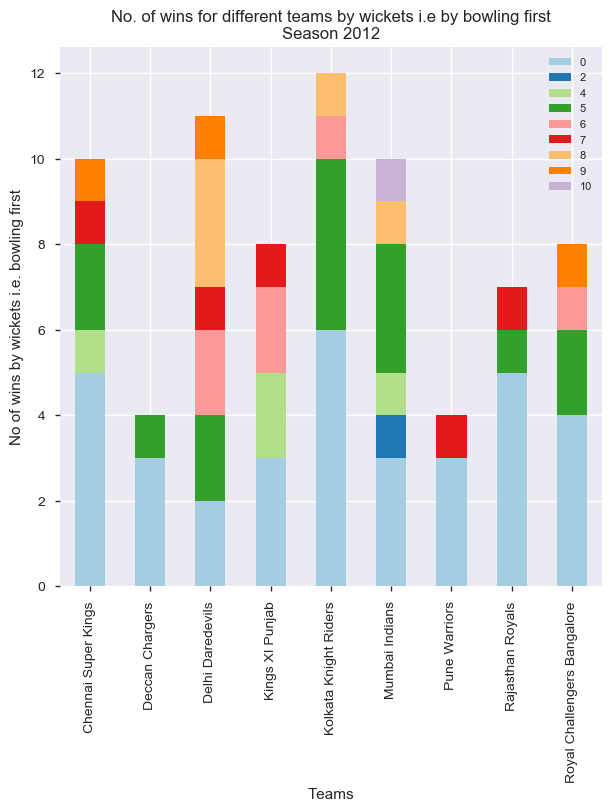

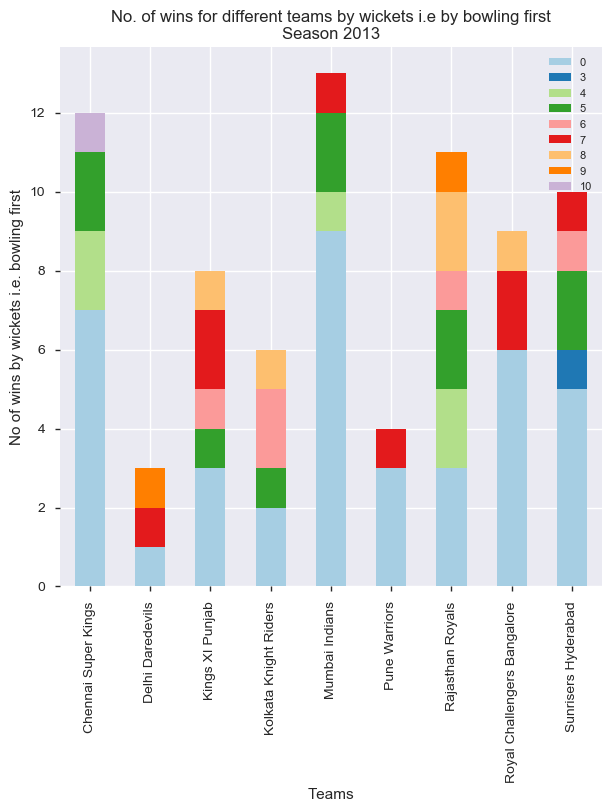

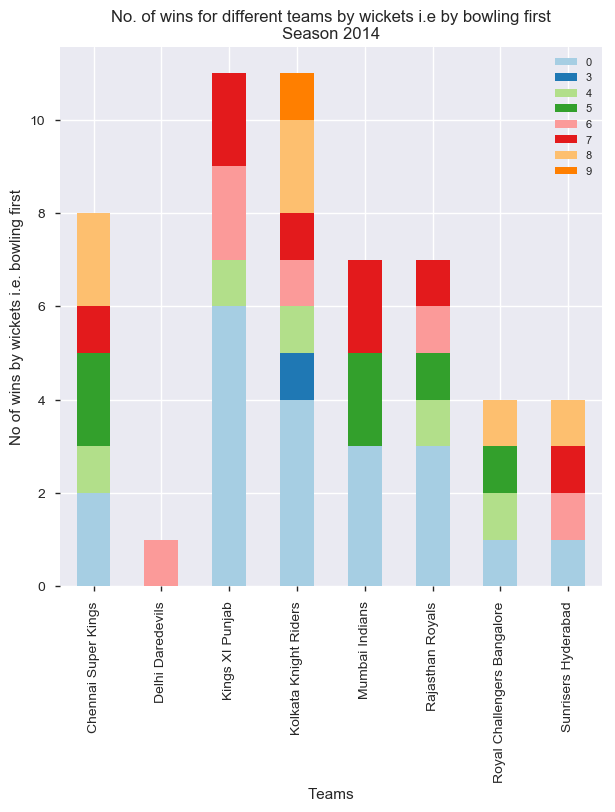

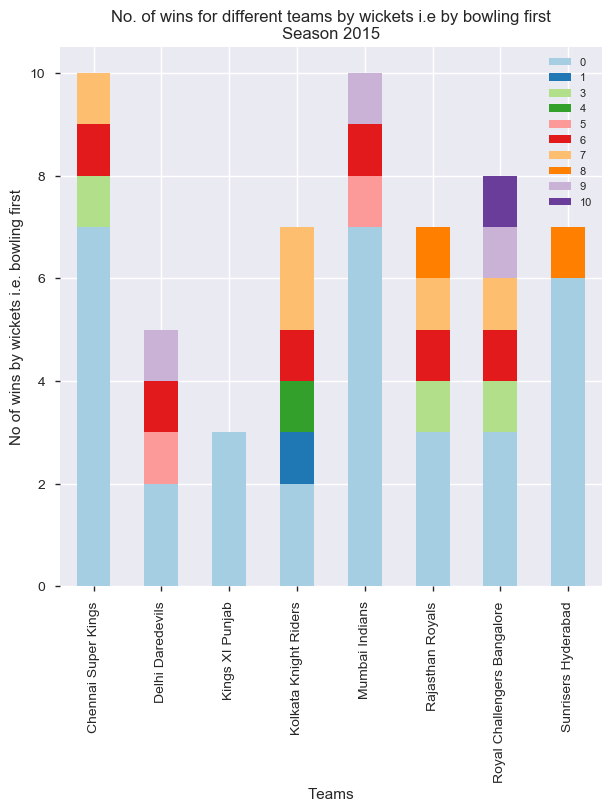

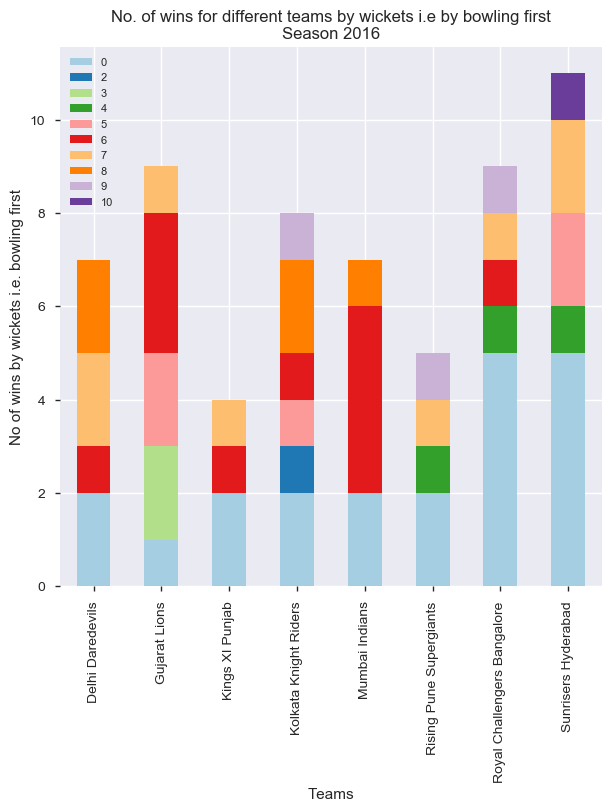

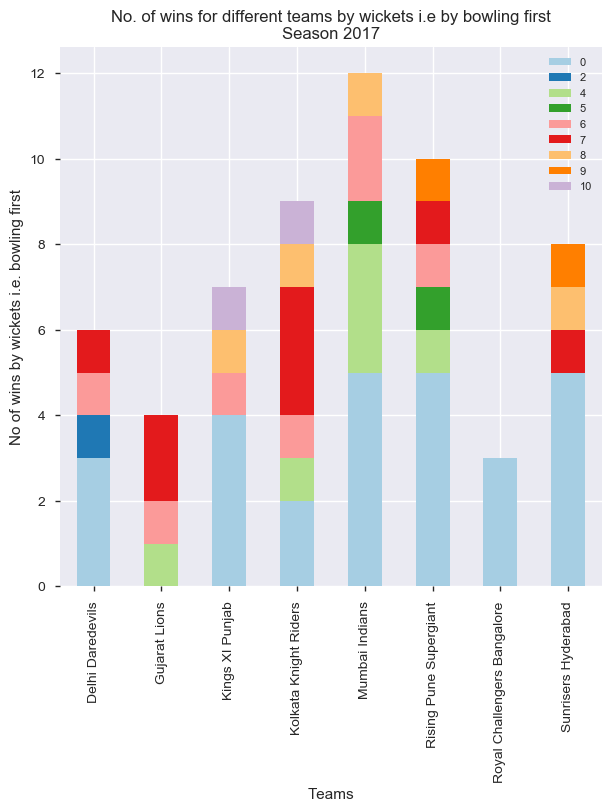

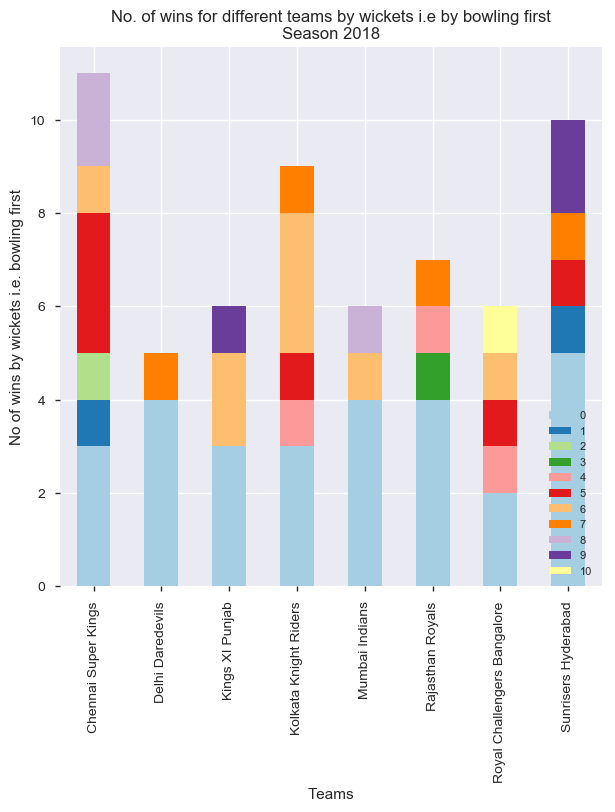

In [254]:
x, y = 2008, 2019
while x < y:
    wins_bywickets = matches[matches['season'] == x].groupby(['winner','win_by_wickets'])['win_by_wickets'].count().unstack()
    plot = wins_bywickets.plot(kind='bar', stacked=True, title="No. of wins for different teams by wickets i.e by bowling first\nSeason "+str(x), figsize=(7,7))
    sns.set_palette("Paired", len(matches['win_by_wickets'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins by wickets i.e. bowling first")
    plot.legend(loc='best', prop={'size':8})
    x+=1

### 5. Questions

#### 5.1 Who won the Player of the match maximum no. of times ?

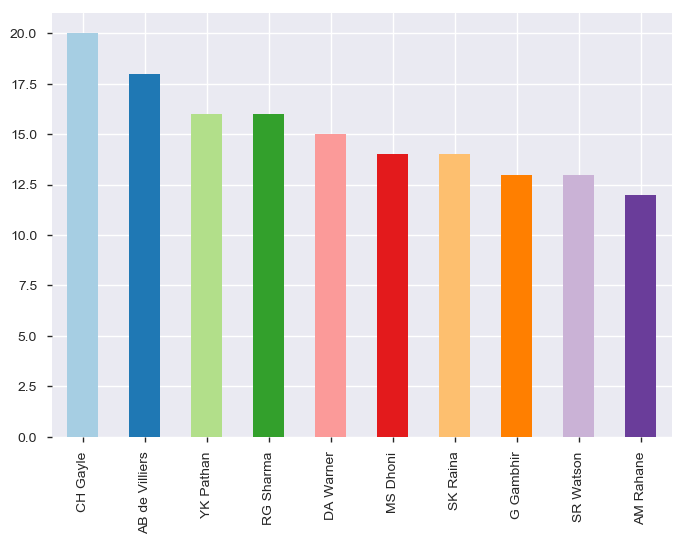

In [255]:
matches['player_of_match'].value_counts()[:10].plot(kind = 'bar')

#### 5.2 What is the impact of toss on match outcome ?

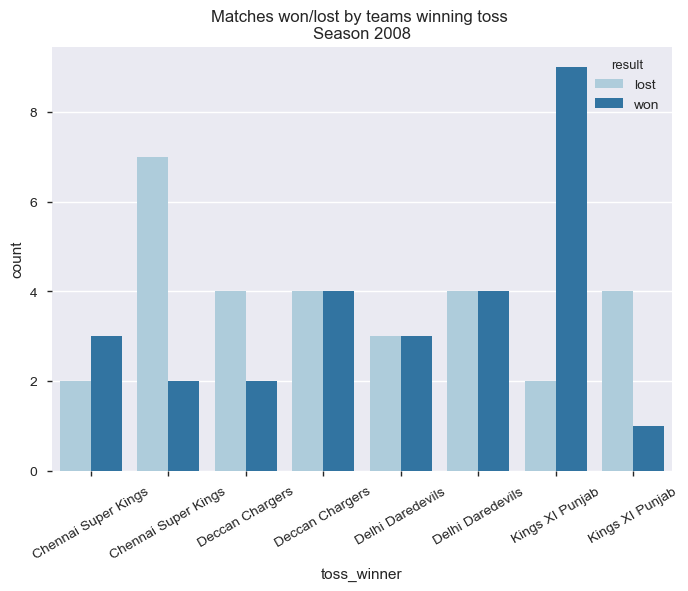

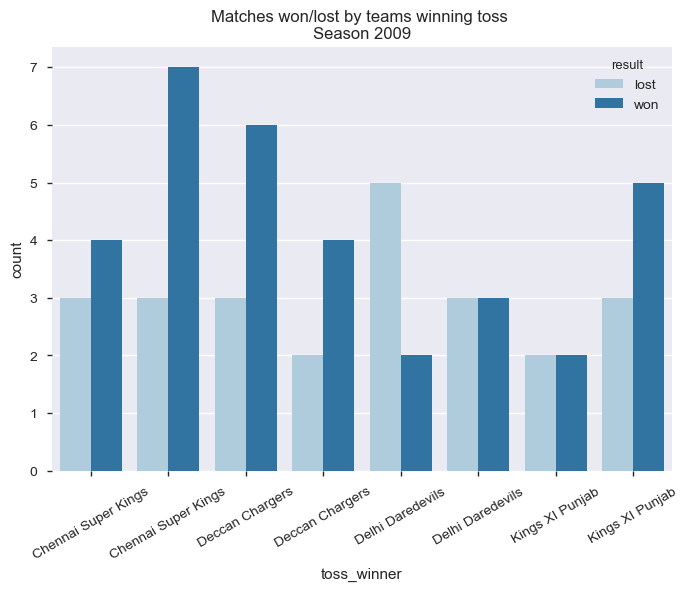

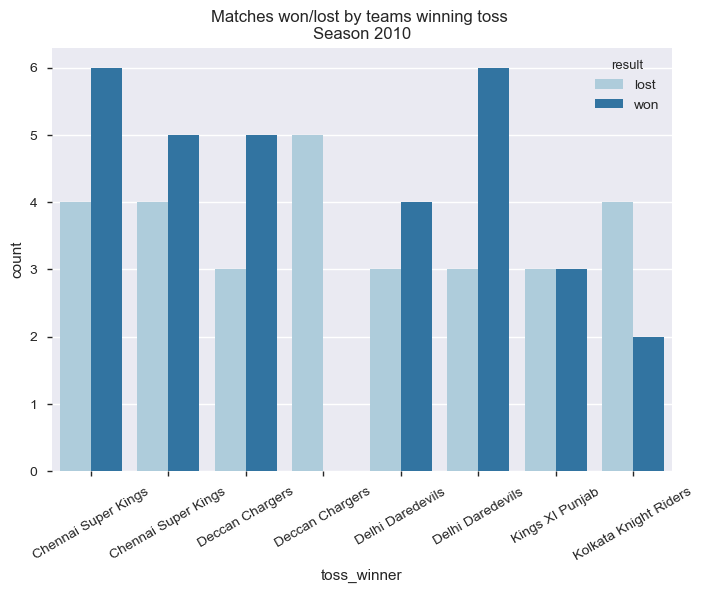

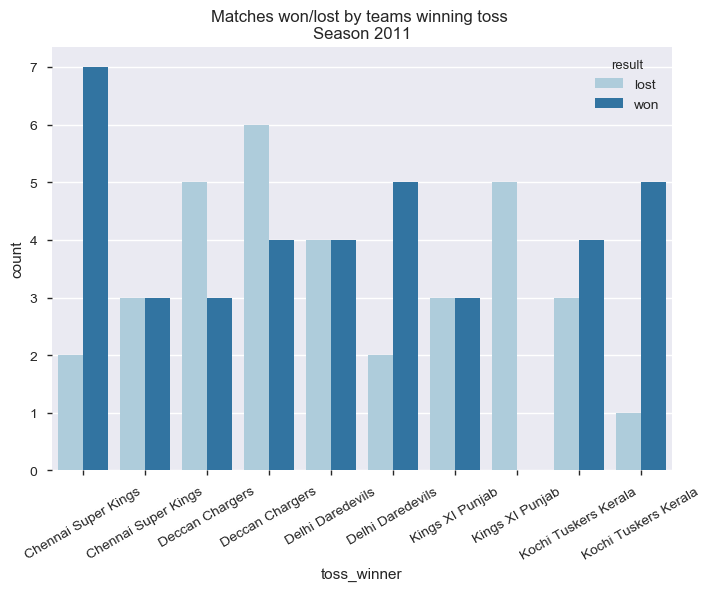

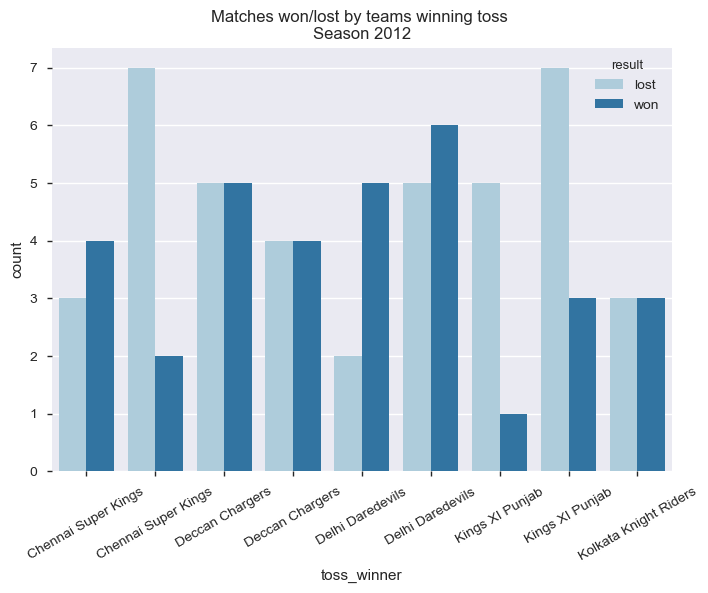

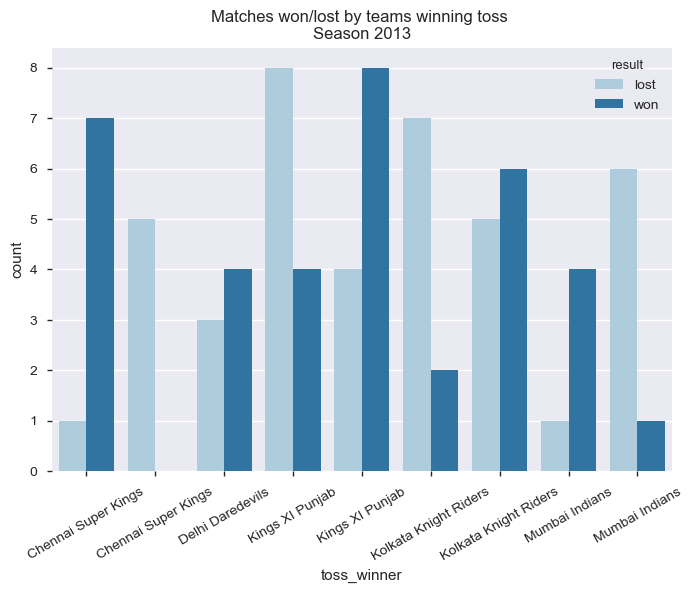

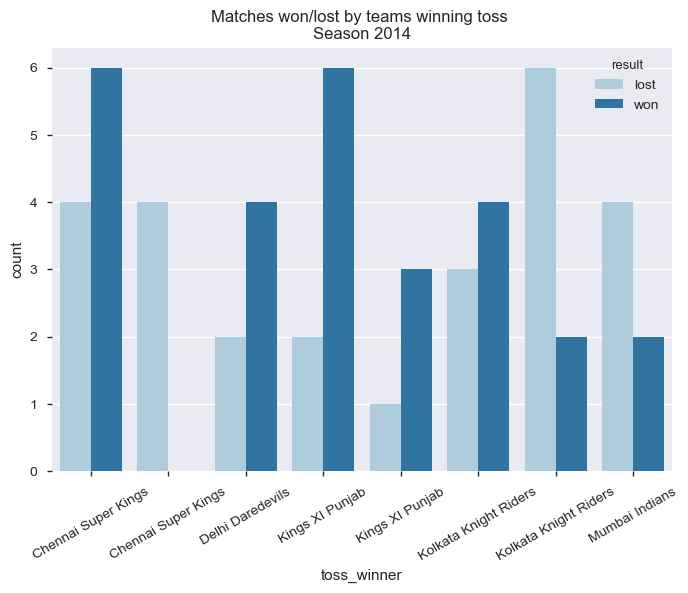

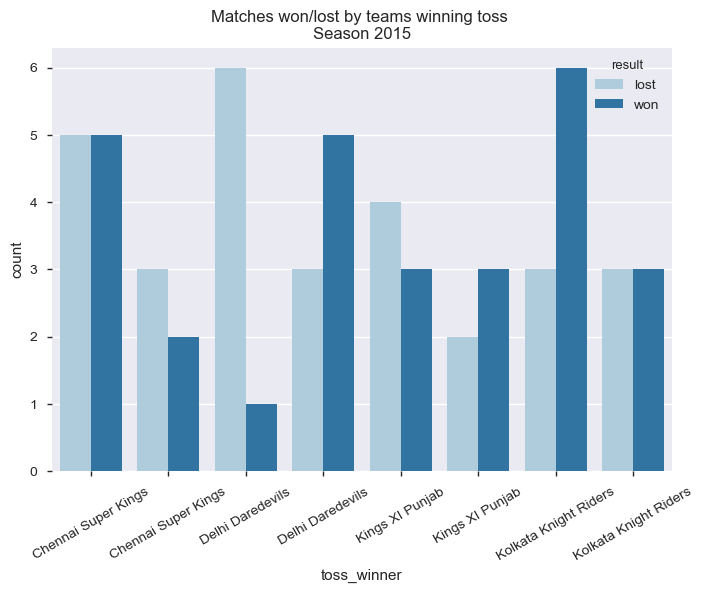

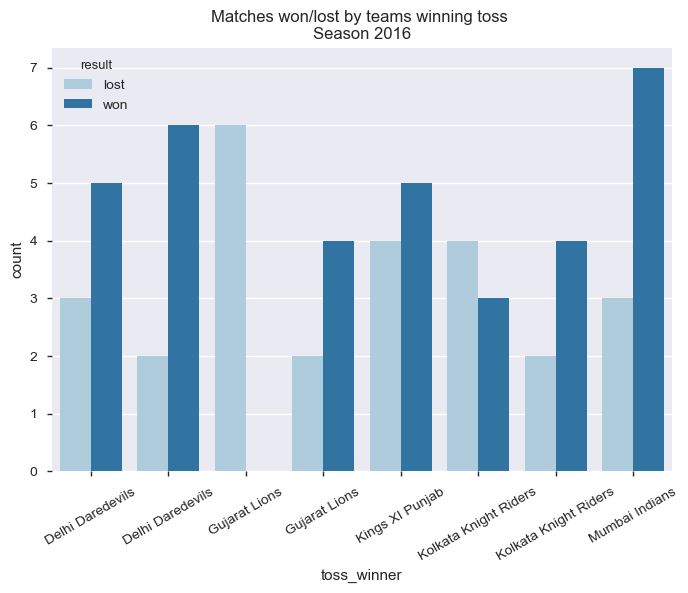

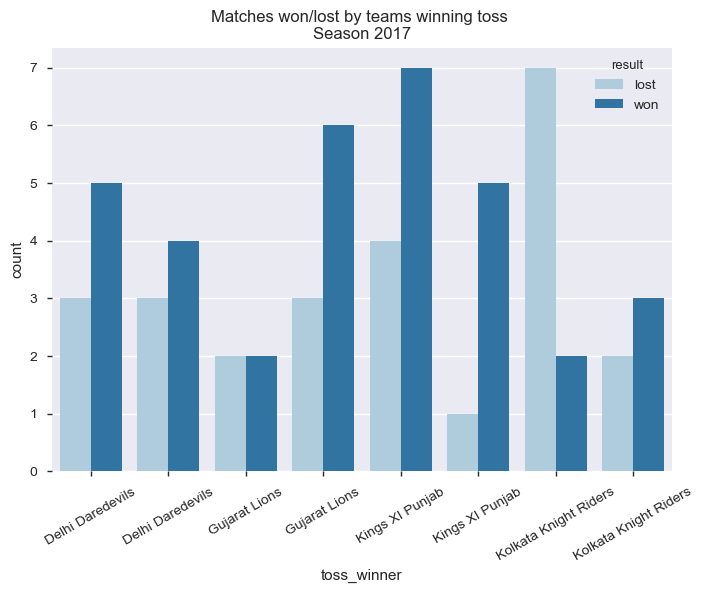

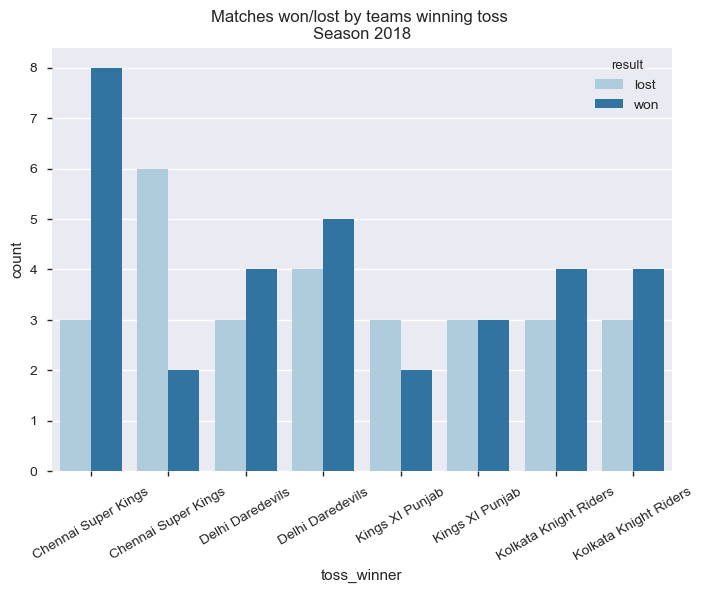

In [256]:
toss = matches.groupby(['season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['season', 'toss_winner','result'])['count'].sum().reset_index()

for x in range(2008, 2019, 1):
    toss_result_x = toss_result[toss_result['season'] == x]
    plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result_x)
    plot.set_title('Matches won/lost by teams winning toss \nSeason ' +str(x))
    plot.set_xticklabels(toss_result_x['toss_winner'],rotation=30)
    plt.show()
    x+=1


### 6. Conclusion

- Most of time the time __Chris Gayle__ has won Player of the match award when we consider all the IPL season from 2008 to 2018
- __Chennai Super Kings__ and __Mumbai Indians__ has both __won 3 seasons of IPL each.__
- In most of the seasons it is observed that when a __team wons a toss__ then __chances of it winning the match is more.__
- From the date columns is it observed that __IPL matches always happens between March-May__ i.e. when it is Summer season in India.
- A team when playing the match on it's __home ground__ has greater chance of __winning the match__.
- In the __year 2009 and 2014 few IPL matches were scheduled outside India__, else all the rest of the matches are within India.
- __Most number of matches__ in a single IPL season were __76__ and played in __2013 IPL season.__